In [1]:
import xarray as xr
import xmitgcm
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from xgcm import Grid

To open the output, point this to the location where the output is located, and run it (it's ok if there is a warning)

The dimensions are time, Z (vertical coordindate of center of cell), YC (y coordinate change for center of grid), XG (change in southern edge), YG (change in western edge), XC (x coordinate change for center of grid), Zl (vertical coordinate of lower cell interface), Zp1 (vertical coordinate of cell interface), Zu( vertical coordinate of upper cell interface). The data variables are UVEL(x or zonal component of velocty), VVEL(y or meridonal component of velocity), WVEL(z or vertical velocity), THETA ( potential temperature in degrees C), SALT (salinity as PPT), CONVADJ(convective adjustment index).

In [2]:
ds = xmitgcm.open_mdsdataset('/home/jupyter-loganpknudsen/run_hr/',prefix=['dyn'])
ds

<xarray.Dataset>
Dimensions:               (time: 1884, Z: 38, YC: 128, XG: 64, YG: 128, XC: 64, Zl: 38, Zp1: 39, Zu: 38, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35)
Coordinates: (12/37)
    iter                  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) timedelta64[ns] 0 days 04:10:00 ... 327 days...
  * XC                    (XC) >f4 0.5078 1.523 2.539 ... 62.46 63.48 64.49
  * YC                    (YC) >f4 -64.49 -63.46 -62.44 ... 63.46 64.49 65.51
  * XG                    (XG) >f4 -4.441e-16 1.016 2.031 ... 61.95 62.97 63.98
  * YG                    (YG) >f4 -65.0 -63.98 -62.95 ... 62.95 63.98 65.0
    ...                    ...
    dyU                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dyF                   (YC, XC) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dxV                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
  * layer_1RHO_bounds     (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
  * layer_1RHO_center     (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47
  * layer_1RHO_interface  (layer_1RHO_interface) >f4 29.0 29.5 ... 34.4 34.45
Data variables:
    UVEL                  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    VVEL                  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    WVEL                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    THETA                 (time, Z, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    SALT                  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    CONVADJ               (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...

In [3]:
ds.Zu[-1]-ds.Zl[-1]

<xarray.DataArray ()>
array(-110.038086, dtype=float32)
Coordinates:
    Zu       >f4 -4.03e+03
    Zl       >f4 -3.92e+03

In [4]:
# ds = xmitgcm.open_mdsdataset('/home/jupyter-loganpknudsen/run_hr/',prefix=['dyn'])
# ds

In [5]:
ds_lr = xmitgcm.open_mdsdataset('/home/jupyter-loganpknudsen/run_lr/',prefix=['dyn'])
ds_lr

<xarray.Dataset>
Dimensions:               (time: 720, Z: 32, YC: 128, XG: 64, YG: 128, XC: 64, Zl: 32, Zp1: 33, Zu: 32, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35)
Coordinates: (12/37)
    iter                  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) timedelta64[ns] 100 days 20:50:00 ... 225 da...
  * XC                    (XC) >f4 0.5078 1.523 2.539 ... 62.46 63.48 64.49
  * YC                    (YC) >f4 -64.49 -63.46 -62.44 ... 63.46 64.49 65.51
  * XG                    (XG) >f4 -4.441e-16 1.016 2.031 ... 61.95 62.97 63.98
  * YG                    (YG) >f4 -65.0 -63.98 -62.95 ... 62.95 63.98 65.0
    ...                    ...
    dyU                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dyF                   (YC, XC) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dxV                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
  * layer_1RHO_bounds     (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
  * layer_1RHO_center     (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47
  * layer_1RHO_interface  (layer_1RHO_interface) >f4 29.0 29.5 ... 34.4 34.45
Data variables:
    UVEL                  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    VVEL                  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    WVEL                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    THETA                 (time, Z, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    SALT                  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
    CONVADJ               (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 32, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...

In [6]:
ds_lr.Zu[-1]-ds_lr.Zl[-1]

<xarray.DataArray ()>
array(-286.06885, dtype=float32)
Coordinates:
    Zu       >f4 -4e+03
    Zl       >f4 -3.714e+03

Salinity in should be equal to salinity out so let's check that the salt drift is small

Note that rA is cell area, drF is the cell vertical size, and hFacC is the vertical fraction of the open cell. \
$$\dfrac{\iiint_{V}Sh_c\,dx\,dy\,dz}{\iiint_{V}h_c\,dx\,dy\,dz}$$

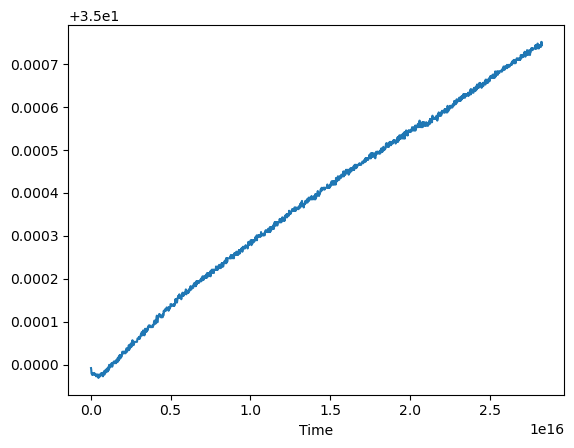

In [7]:
(((ds.SALT*ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z']))/(ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z'])).plot()

Now we want to know: is the ocean in equilibrium? We can plot a few things to help with this


$$\dfrac{\iiint_{V}\theta h_c\,dx\,dy\,dz}{\iiint_{V}h_c\,dx\,dy\,dz}$$

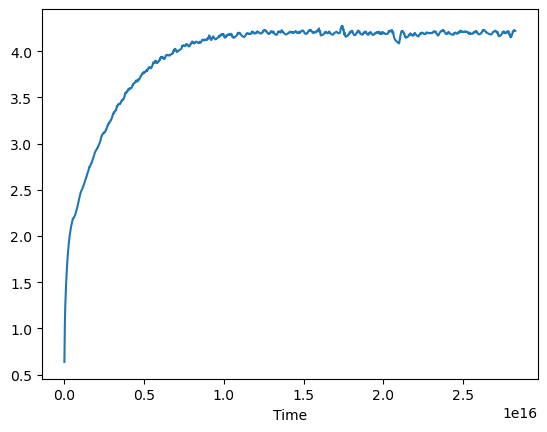

In [8]:
#the mean temperature
(((ds.THETA*ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z']))/(ds.rA*ds.drF*ds.hFacC).sum(['XC','YC','Z'])).plot()

$$\dfrac{\iint_{A_{z_b}}\theta h_c\,dx\,dy}{\iint_{A_{z_b}}h_c\,dx\,dy}$$

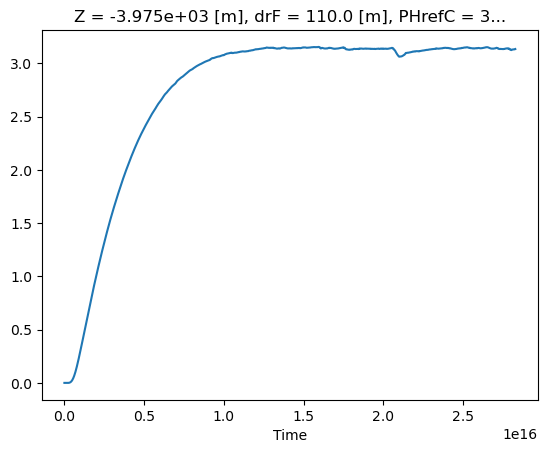

In [9]:
#the mean temperature in the bottom level
(((ds.THETA*ds.rA*ds.drF*ds.hFacC).isel(Z=-1).sum(['XC','YC']))/(ds.rA*ds.drF*ds.hFacC).isel(Z=-1).sum(['XC','YC'])).plot()

Let's also just plot the temperature at the surface

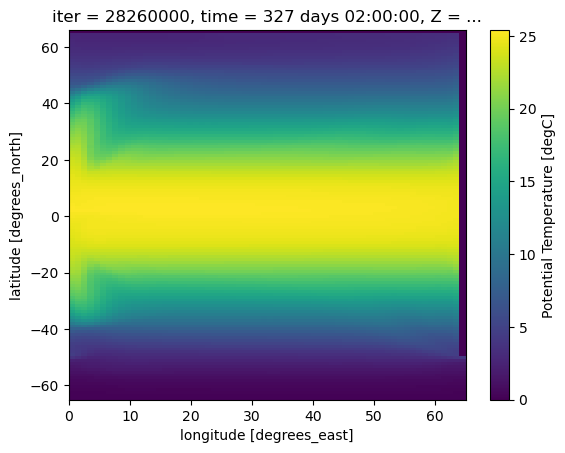

In [10]:
ds.THETA.isel(time=-1,Z=0).plot()

Now let's plot the vertical velocity at the bottom:

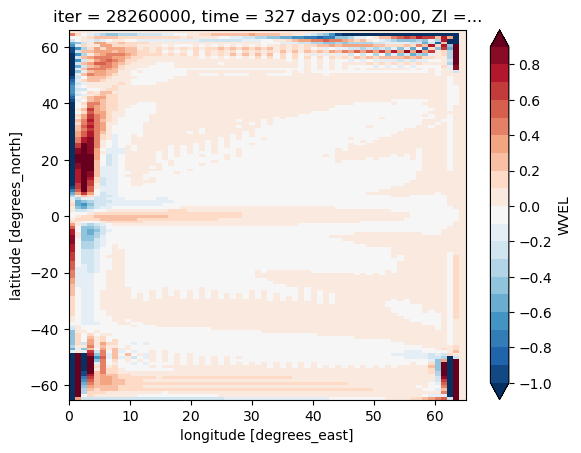

In [11]:
(ds.WVEL.isel(time=-1,Zl=-1)*10**6).plot(levels=np.arange(-1,1,0.1))

Now we're going to plot the streamfunction of the Meridional Overturning Circulation:

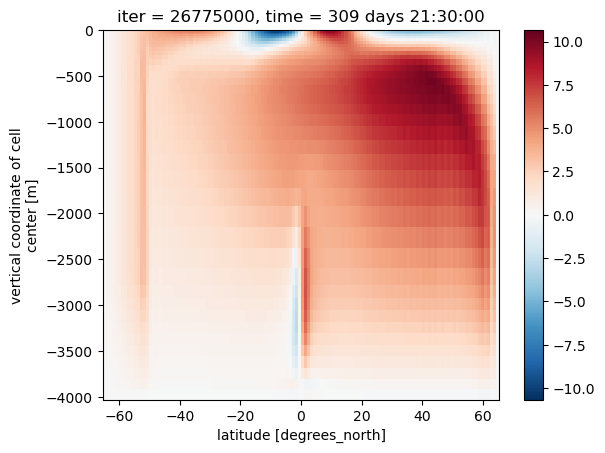

In [49]:
T = -1
# plt.subplot(3,1,1)
# (((ds_lr.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC').cumsum("Z"))/10**6).plot()
# plt.subplot(3,1,1)
# (((ds.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC').cumsum("Z"))/10**6).plot()
# plt.subplot(3,1,3)
(((ds.VVEL*ds.dxG*ds.drF).isel(time=-100).sum('XC').cumsum("Z"))/10**6).plot()

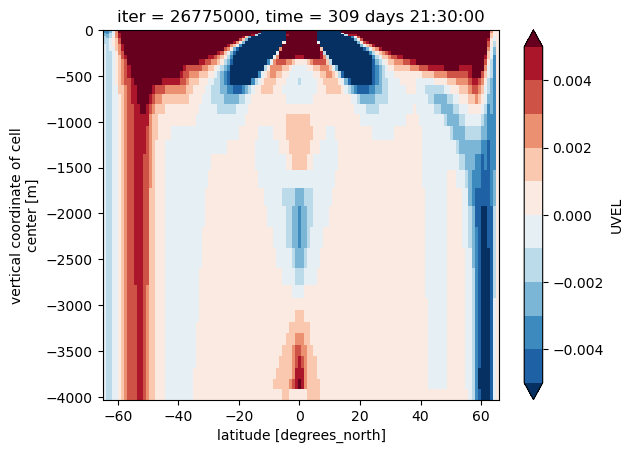

In [50]:
u_vel = ((ds.UVEL).isel(time=-100).mean('XG'))
u_vel.plot(levels=np.arange(-0.005,0.0051,0.001))

(-0.1, 0.2)

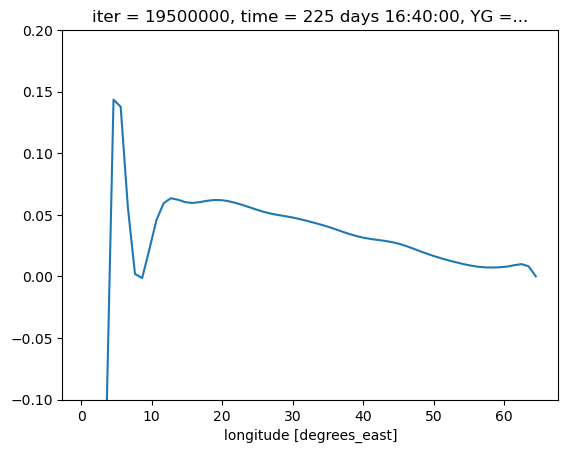

In [13]:
drf = ds_lr.drF.isel(Z=31)
V = (ds_lr.VVEL*ds_lr.drF).isel(Z=-1,time=-1,YG=64)
V.plot()
plt.ylim([-0.1,0.2])

(-0.1, 0.2)

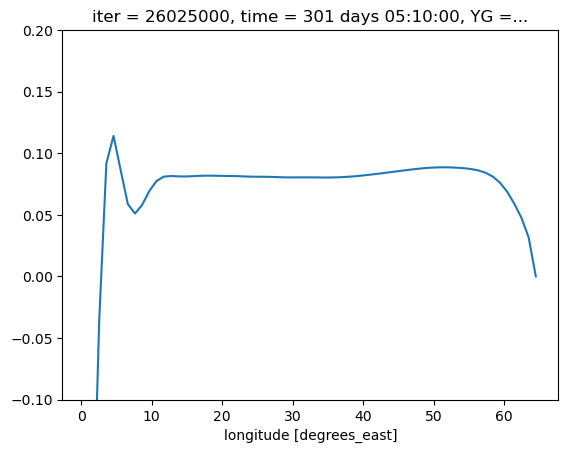

In [14]:
drf = ds.drF.isel(Z=-1)
V = (ds.VVEL*ds.drF).isel(Z=-1,time=-150,YG=64)
V.plot()
plt.ylim([-0.1,0.2])

In [15]:
np.sqrt((2*10**(-2))/(2*(2*np.pi/(24*3600))))

11.726460285670079

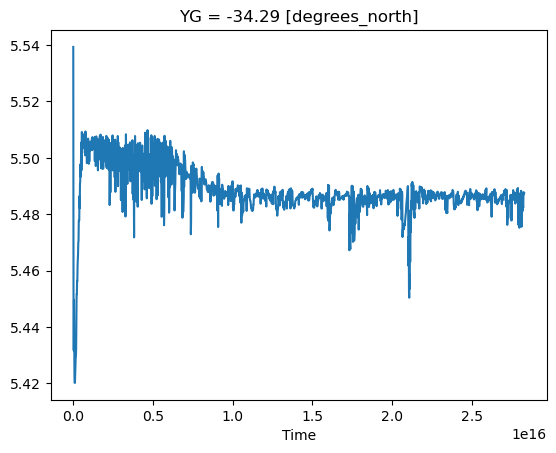

In [16]:
(((ds.VVEL*ds.dxG*ds.drF).isel(YG=30).sum('XC').cumsum("Z").max("Z"))/10**6).plot()

(-10.0, 10.0)

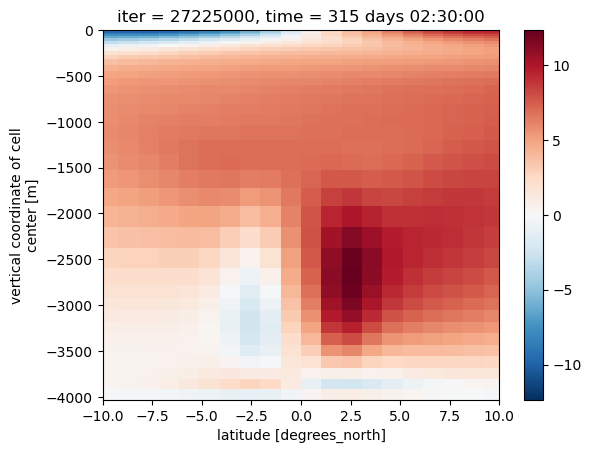

In [17]:
T = -1
plt.subplot(1,1,1)
(((ds.VVEL*ds.dxG*ds.drF).isel(time=-70).sum('XC').cumsum("Z"))/10**6).plot()
plt.xlim([-10,10])

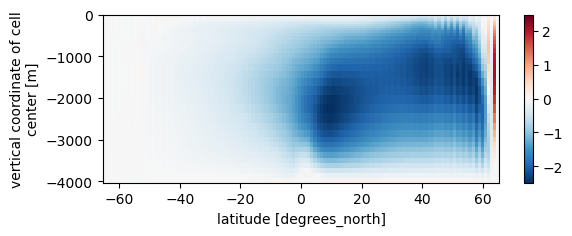

In [18]:
plt.subplot(2,1,2)
(((ds.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC').cumsum("Z"))/10**6-((ds.VVEL*ds.dxG*ds.drF).isel(time=-30).sum('XC').cumsum("Z"))/10**6).plot()

### I often find it quite useful to look at how this is changing too:

$$ \int_{0}^{60}v_{t_1}\, dx -\int_{0}^{60}v_{t_2}\, dx$$

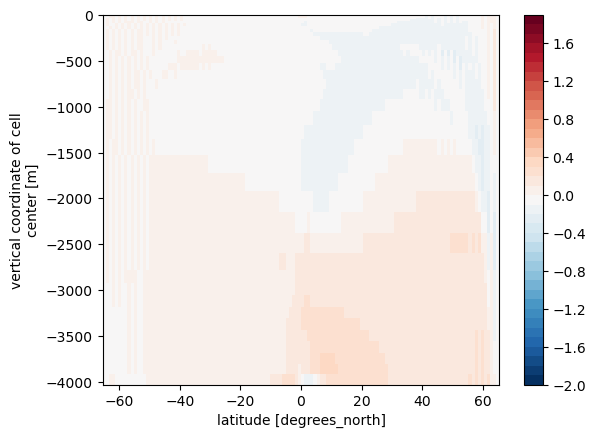

In [20]:
x = ((ds.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC')/10**6-(ds.VVEL*ds.dxG*ds.drF).isel(time=-30).sum('XC')/10**6)
x.plot(levels=np.arange(-2,2,0.1))

$$ \Psi =\int_{z}^0\int_{0}^{60}v\, dx\,dz' $$

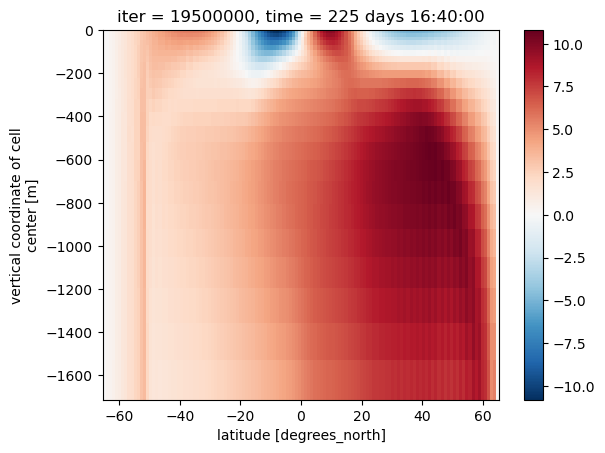

In [21]:
a = (ds_lr.VVEL*ds.dxG*ds.drF).isel(time=-1).sum('XC')/10**6
b = a.cumsum('Z')
b.plot()

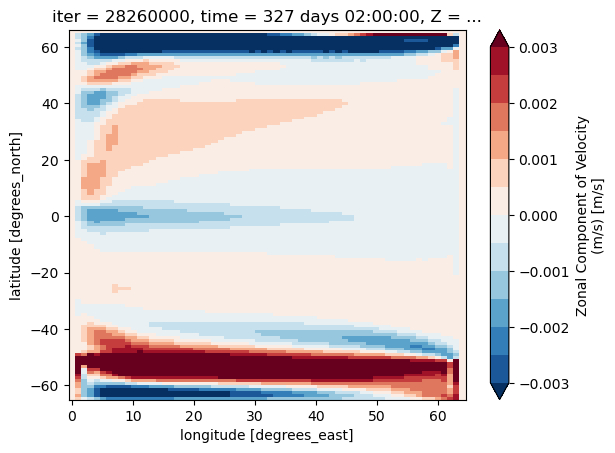

In [22]:
bottom_u = ds.UVEL.isel(time=-1,Z=31)
bottom_u.plot(levels=np.arange(-0.003,0.0031,0.0005))

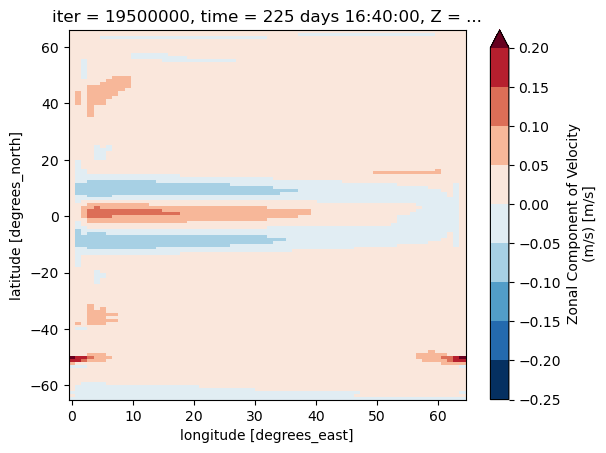

In [23]:
bottom_u = ds_lr.UVEL.isel(time=-1,Z=0)
bottom_u.plot(levels=np.arange(-0.25,0.25,0.05))

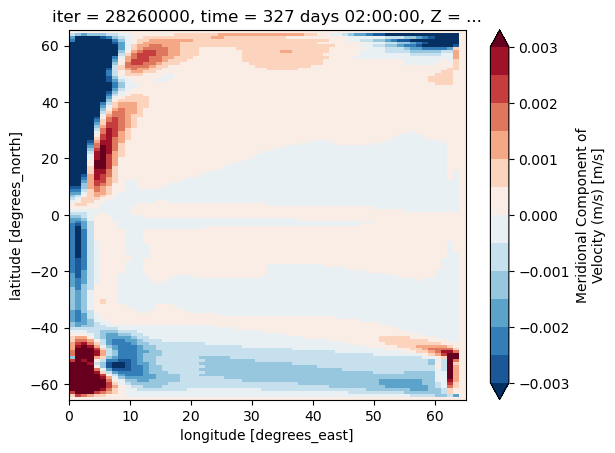

In [24]:
bottom_v = ds.VVEL.isel(time=-1,Z=31)
bottom_v.plot(levels=np.arange(-0.003,0.0031,0.0005))

-402.7481308593751

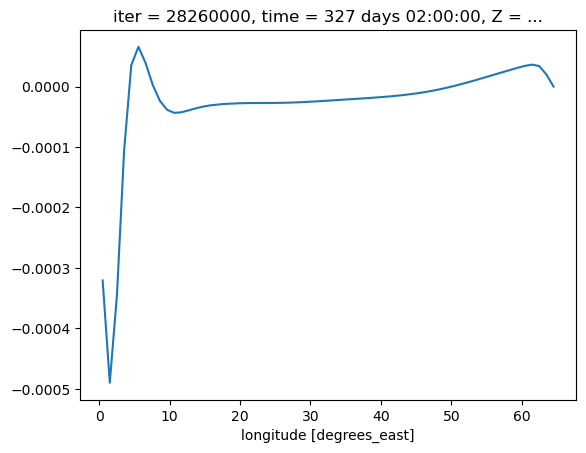

In [25]:
r_e = 6378
dy = r_e*(np.radians(ds.YG[64]-ds.YG[63]))
drf = ds.drF.isel(Z=30)
v_2 = ds.VVEL.isel(time=-1,Z=30,YG=64)
v_1 = ds.VVEL.isel(time=-1,Z=30,YG=63)
dv = -1*(v_2-v_1)/dy
w_s = dv*drf
w_s.plot()
ds.Z[-1].values+3572.361

array(1.02349, dtype=float32)

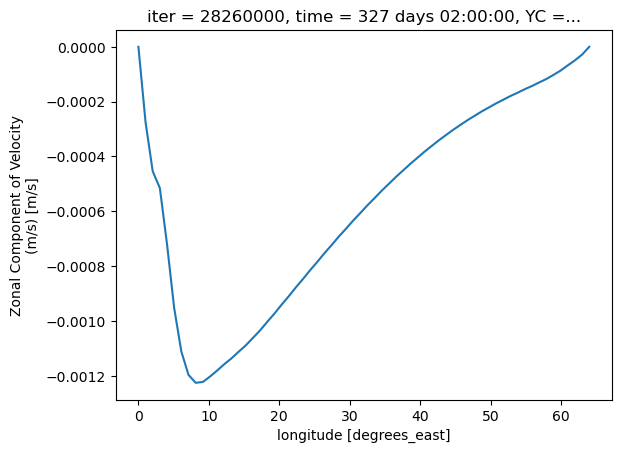

In [26]:
bottom_u = ds.UVEL.isel(time=-1,Z=-5,YC=66)
bottom_u.plot()
ds.YC[64].values

In [27]:
d = np.sqrt(2*10**(-4)*2/(2*7.2921*10**(-5)*np.sin(np.radians(1.02349))))
d

12.391382209838541

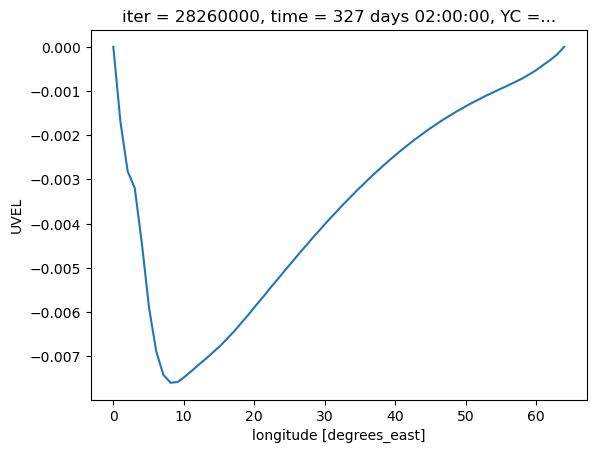

In [28]:
(bottom_u*d/2).plot()

array(-1.02375, dtype=float32)

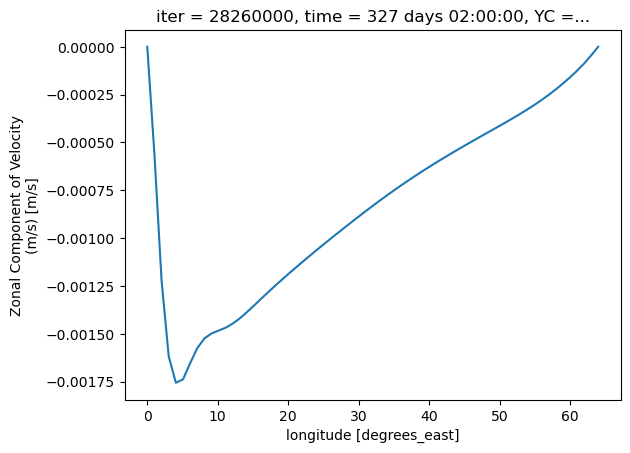

In [29]:
bottom_u = ds.UVEL.isel(time=-1,Z=31,YC=62)
bottom_u.plot()
ds.YC[62].values

In [30]:
d = np.sqrt(2*10**(-4)*2/(-2*7.2921*10**(-5)*np.sin(np.radians(-1.02375))))
d

12.389808768481585

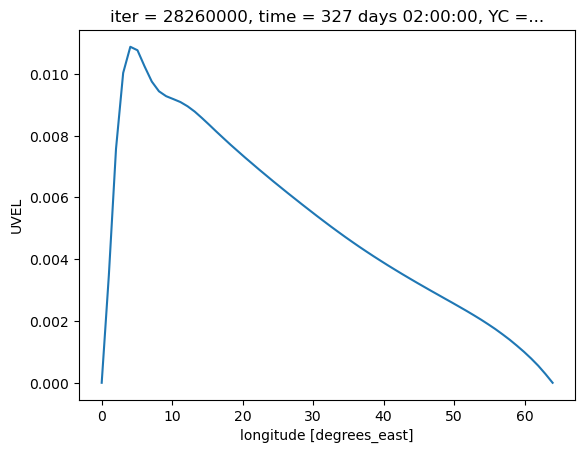

In [31]:
(-1*bottom_u*d/2).plot()

(-0.5, 0.1)

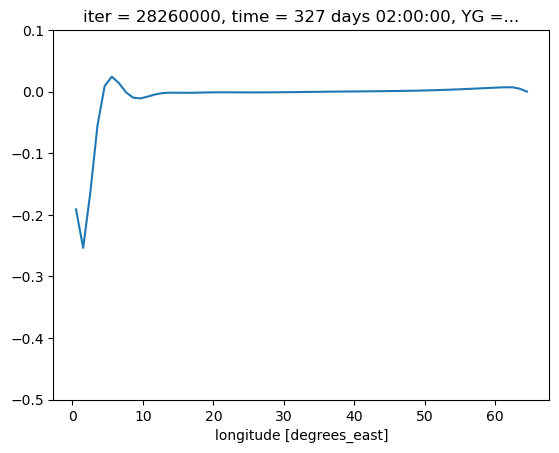

In [32]:
drf = ds.drF.isel(Z=31)
V = (ds.VVEL*drf).isel(Z=31,time=-1,YG=62)
V.plot()
plt.ylim([-0.5,0.1])

In [33]:
ds

<xarray.Dataset>
Dimensions:               (time: 1884, Z: 38, YC: 128, XG: 64, YG: 128, XC: 64, Zl: 38, Zp1: 39, Zu: 38, layer_1RHO_bounds: 37, layer_1RHO_center: 36, layer_1RHO_interface: 35)
Coordinates: (12/37)
    iter                  (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) timedelta64[ns] 0 days 04:10:00 ... 327 days...
  * XC                    (XC) >f4 0.5078 1.523 2.539 ... 62.46 63.48 64.49
  * YC                    (YC) >f4 -64.49 -63.46 -62.44 ... 63.46 64.49 65.51
  * XG                    (XG) >f4 -4.441e-16 1.016 2.031 ... 61.95 62.97 63.98
  * YG                    (YG) >f4 -65.0 -63.98 -62.95 ... 62.95 63.98 65.0
    ...                    ...
    dyU                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dyF                   (YC, XC) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
    dxV                   (YG, XG) >f4 dask.array<chunksize=(128, 64), meta=np.ndarray>
  * layer_1RHO_bounds     (layer_1RHO_bounds) >f4 28.0 29.0 29.5 ... 34.45 34.5
  * layer_1RHO_center     (layer_1RHO_center) float32 28.5 29.25 ... 34.43 34.47
  * layer_1RHO_interface  (layer_1RHO_interface) >f4 29.0 29.5 ... 34.4 34.45
Data variables:
    UVEL                  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    VVEL                  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    WVEL                  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    THETA                 (time, Z, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    SALT                  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
    CONVADJ               (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 38, 128, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir=None, iters=No...

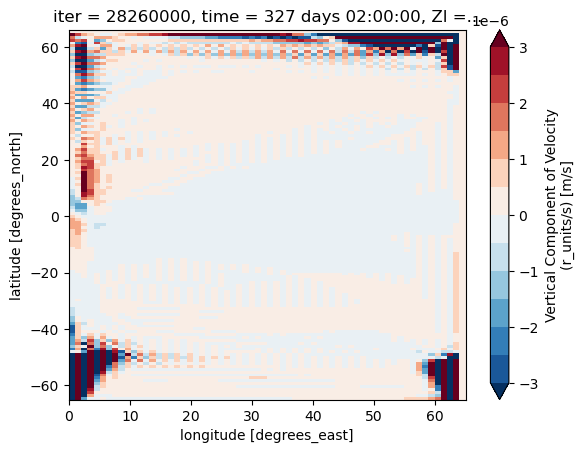

In [34]:
bottom_w = ds.WVEL.isel(time=-1,Zl=31)
bottom_w.plot(levels=np.arange(-0.003,0.0031,0.0005)*10**(-3))

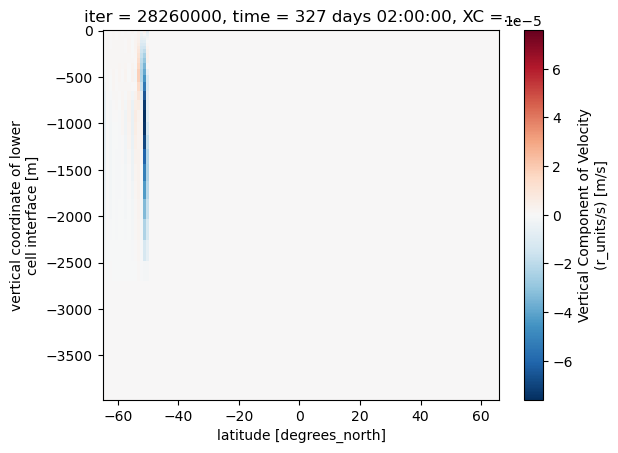

In [35]:
#the mean temperature in the bottom level
(ds.WVEL).isel(time=-1,XC=63).plot()